# Assignment 5 

In [11]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Problem 1: Leap frog with RK4 half step

In [26]:
nbodies = 2

x = np.zeros([nbodies, 2])
v = np.zeros([nbodies, 2])
m = np.zeros([nbodies])

'''Define normalized, dimensionless units: G = MSun = radius = 1'''  
G = 1 # gravitational constant
r = 1 # radius of Earth orbit around sun

'''SUN''' 
m[0] = 1
x[0] = np.array([0.0, 0.0]) 
v[0] = np.array([0.0, 0.0])

'''EARTH'''
m[1] = 3.0027e-6
x[1] = np.array([1.0, 0.0])
v[1] = np.array([0.0, np.sqrt(G*m[0]/r)])


''' Define acceleration due to gravitation '''
def grav_acceleration(x, m):
    a = np.zeros_like(x)
    for i in range(nbodies):
        for j in range(nbodies):
            r = x[j] - x[i]
            if i != j:
                a[i] += r*G*m[j]/pow(np.linalg.norm(r),3)
    return a

t = 0
dt = 2 * np.pi/1000
tstop = 10 * np.pi

'''half time step to find v, using acceleration at t = 0'''
k1 = dt * grav_acceleration(x, m)
k2 = dt * grav_acceleration(x + (k1 * 0.5), m)
k3 = dt * grav_acceleration(x + (k2 * 0.5), m)
k4 = dt * grav_acceleration(x + k3, m)

v = v + (k1 + 2*k2 + 2*k3 + k4)/6


xearth, yearth, time, velocity = [], [], [], []

while t < tstop:
#for time in t:
    t = t + dt
    x = x + dt*v
    a = grav_acceleration(x, m)
    v = v + dt*a
    
    xearth.append(x[1,0])
    yearth.append(x[1,1])
    time.append(t)
    velocity.append(v)

Plot of Orbit

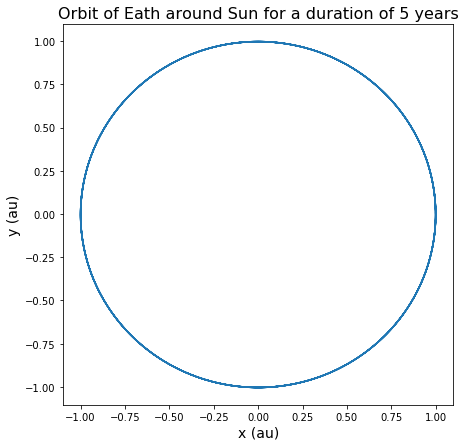

In [13]:
fig1, ax = plt.subplots(figsize = (7, 7))

ax.errorbar(xearth, yearth,
            fmt = '-', ecolor = 'k', capsize = 1)

ax.set_xlabel('x (au)', fontsize = 14)
ax.set_ylabel('y (au)', fontsize = 14)
ax.set_title('Orbit of Eath around Sun for a duration of 5 years', 
             fontsize = 16)

plt.show()

Total Energy: Kinetic + Potential Energy

In [25]:
'''Difference and Change in Radius'''
final_x = xearth[-1]
final_y = yearth[-1]
final_v = np.linalg.norm(v[1])

print('Final velocity is', final_v)

radius = np.sqrt(final_x**2 + final_y**2)
difference = np.absolute((r - radius)/r)


print('After 5 years the new radius is', radius, 'as compared to 1' )
print('The change in radius is', difference)

'''
Total Energy: Kinetic + Potential
Kinetic = 1/2mv^2
Potential = -Gm/r
'''
Total_energyi = (0.5 * m[1]) - (m[1] * m[0] * (r)**-1)
Total_energyf = (0.5 * m[1]*final_v**2) - (m[1] * m[0] * (radius)**-1)

E_change = (Total_energyf - Total_energyi)/Total_energyi

print('The change in Total Energy after 5 years is', E_change)

Final velocity is 1.0000387337496899
After 5 years the new radius is 0.9999817877312505 as compared to 1
The change in radius is 1.8212268749540073e-05
The change in Total Energy after 5 years is -4.1043798798751076e-05


In [27]:
''' 
# Total energy plotted 

xearth = np.array(xearth)
yearth = np.array(yearth)
time = np.array(time)
velocity = np.array(velocity)

radii = np.sqrt(xearth**2 + yearth**2)

energy = 0.5*G*m[0]*velocity[1]**2 - (m[0] * m[1]*(radii)**-1)
    
fig2, ax2 = plt.subplots(figsize = (7, 7))

ax2.errorbar(time , energy,
            fmt = '-', ecolor = 'k', capsize = 1)

ax2.set_xlabel('time', fontsize = 14)
ax2.set_ylabel('Total Energy', fontsize = 14)
ax2.set_title('Orbit of Eath around Sun for a duration of 5 years', 
             fontsize = 16)

plt.show()
'''

ValueError: operands could not be broadcast together with shapes (2,2) (5001,) 

### Problem 2: 3 body problem

In [7]:
nbodies = 3
e = 0.6 # eccentricity
a = 4 # semi major axis (au)

x = np.zeros([nbodies, 2])
v = np.zeros([nbodies, 2])
m = np.zeros([nbodies])

'''Solar mass central star''' 
m[0] = 1
x[0] = np.array([0.0, 0.0]) 
v[0] = np.array([0.0, 0.0])

'''Earth mass planet'''
m[1] = 3.0027e-6
x[1] = np.array([1.0, 0.0])
v[1] = np.array([0.0, 1.0])

'''Jupiter mass planet'''
num = G * m[0] * (1 + e)
dem = a * (1 - e)

r2 = (1 - e)*a

tangential_velocity = np.sqrt(num/dem)

m[2] = 9.55e-4
x[2] = np.array([r2, 0.0])
v[2] = np.array([0.0, tangential_velocity])


In [8]:
t = 0
dt = 2 * np.pi/1000
tstop = 200 * np.pi

'''half time step to find v, using acceleration at t = 0'''

k1 = dt * grav_acceleration(x, m)
k2 = dt * grav_acceleration(x + (k1 * 0.5), m)
k3 = dt * grav_acceleration(x + (k2 * 0.5), m)
k4 = dt * grav_acceleration(x + k3, m)

v = v + (k1 + 2*k2 + 2*k3 + k4)/6

x_1, y_1 = [], []
x_2, y_2 = [], []

while t < tstop:
#for time in t:
    t = t + dt
    x = x + dt*v
    a = grav_acceleration(x, m)
    v = v + dt*a
    
    x_1.append(x[1,0])
    y_1.append(x[1,1]) 
    
    x_2.append(x[2,0])
    y_2.append(x[2,1])     

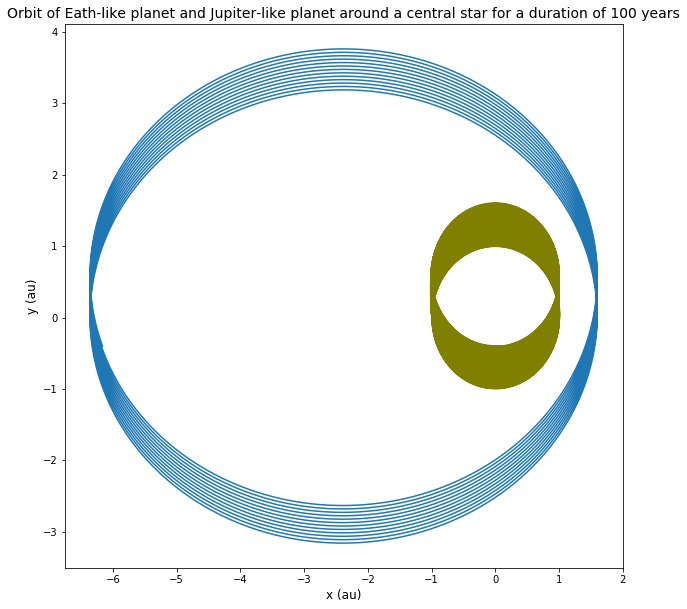

In [9]:
fig1, ax = plt.subplots(figsize = (10, 10))

ax.errorbar(x_1, y_1,
            fmt = '-', color = 'olive', ecolor = 'k', capsize = 1)
ax.errorbar(x_2, y_2,
            fmt = '-', ecolor = 'k', capsize = 1)

ax.set_xlabel('x (au)', fontsize = 12)
ax.set_ylabel('y (au)', fontsize = 12)
ax.set_title('Orbit of Eath-like planet and Jupiter-like planet around a central star for a duration of 100 years', 
             fontsize = 14)

plt.show()